<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
import numpy as np

def sum_prod(X, V):
    arrayX = np.array(X)
    arrayV = np.array(V)[:, :, np.newaxis]
    summa = np.sum(arrayX * arrayV, axis=0)
    return summa

X1 = np.array([[5, 2], [3, 1]])
X2 = np.array([[2, 4], [5, 8]])
V1 = np.array([[1], [2]])
V2 = np.array([[1], [2]])

print(f'{sum_prod(X1, V1)} \n ------')
print(f'{sum_prod(X2, V2)} \n ------')
print(f'{sum_prod([X1, X2], [V1, V2])} \n')

[[15  6]
 [ 9  3]] 
 ------
[[ 6 12]
 [15 24]] 
 ------
[[[10  4]
  [ 6  2]]

 [[ 8 16]
  [20 32]]] 



<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
def binarize(M, threshold=0.5):
  return np.where(M > threshold, 1, 0)

M1 = np.array([[0.3, 0.2], [0.7, 0.1]])
M2 = np.array([[0.6, 0.6], [0.7, 0.9]])
M3 = np.array([[0.3, 0.6], [1, 0.4]])

assert np.array_equal(binarize(M1, threshold=0.5), np.array([[0,0],[1,0]]))
assert np.array_equal(binarize(M2, threshold=0.5), np.array([[1,1],[1,1]]))
assert np.array_equal(binarize(M3, threshold=0.5), np.array([[0,1],[1,0]]))


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [5]:
def unique_rows(mat):
  unique_el_rows = [np.unique(row) for row in mat]
  return f'Уникальные элементы из каждой строки матрицы: {unique_el_rows}'

def unique_columns(mat):
  mat = np.transpose(mat)
  unique_el_columns = [np.unique(column) for column in mat]
  return f'Уникальные элементы из каждого столбца матрицы: {unique_el_columns}'

mat1 = [[1, 2, 2], [1, 5, 6], [7, 8, 2]] #имеются повторяющиеся элементы
mat2 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]] #повторяющиеся элементы отсутствуют

print(unique_rows(mat1))
print(unique_columns(mat1))
print('-'*100)
print(unique_rows(mat2))
print(unique_columns(mat2))


Уникальные элементы из каждой строки матрицы: [array([1, 2]), array([1, 5, 6]), array([2, 7, 8])]
Уникальные элементы из каждого столбца матрицы: [array([1, 7]), array([2, 5, 8]), array([2, 6])]
----------------------------------------------------------------------------------------------------
Уникальные элементы из каждой строки матрицы: [array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]
Уникальные элементы из каждого столбца матрицы: [array([1, 4, 7]), array([2, 5, 8]), array([3, 6, 9])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Сгенерированная матрица:
 [[ 0.3228313   0.55525727 -0.12308566]
 [ 0.55585736  0.44131152  2.24158216]
 [-1.61022599  0.38939345 -0.09577686]
 [-0.34458955  0.75322688 -0.6127661 ]]

Мат. ожидание для каждой строки:
 [ 0.25166763  1.07958368 -0.4388698  -0.06804292]
Дисперсия для каждой строки:
 [0.07922365 0.67730703 0.72526937 0.34922849]

Мат. ожидание для каждого столбца:
 [-0.26903172  0.53479728  0.35248839]
Дисперсия для каждого столбца:
 [0.70881372 0.01950299 1.23187598]


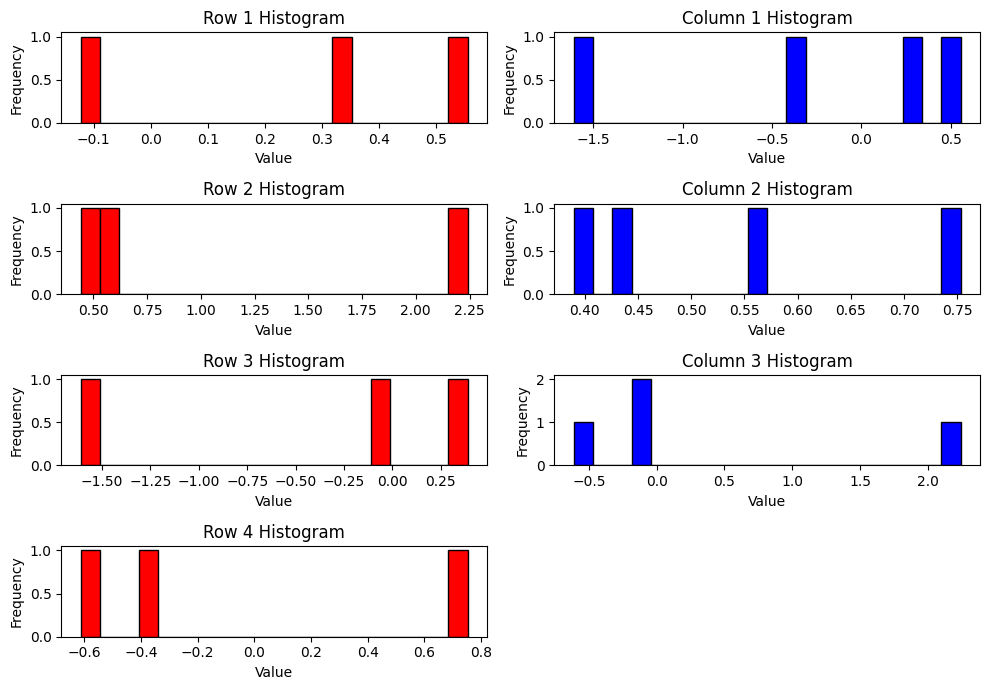

In [7]:
def create_matrix(m, n):
  mat = np.random.randn(m, n)
  return mat

def calculate_means(mat):
  row_means = np.mean(mat, axis=1)
  col_means = np.mean(mat, axis=0)
  return row_means, col_means

def calculate_vars(mat):
  row_vars = np.var(mat, axis=1)
  col_vars = np.var(mat, axis=0)
  return row_vars, col_vars

def create_hist(mat):
  plt.figure(figsize=(10, 7))
  m, n = mat.shape

  for i in range(m):
        plt.subplot(m, 2, 2*i+1)
        plt.hist(mat[i], bins=20, color='red', edgecolor='black')
        plt.title(f'Row {i+1} Histogram')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

  for j in range(n):
        plt.subplot(m, 2, 2*j+2)
        plt.hist(mat[:, j], bins=20, color='blue', edgecolor='black')
        plt.title(f'Column {j+1} Histogram')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()

mat = create_matrix(4, 3)
print(f'Сгенерированная матрица:\n {mat}\n')

row_means, col_means = calculate_means(mat)
row_vars, col_vars = calculate_vars(mat)

print(f'Мат. ожидание для каждой строки:\n {row_means}')
print(f'Дисперсия для каждой строки:\n {row_vars}\n')
print(f'Мат. ожидание для каждого столбца:\n {col_means}')
print(f'Дисперсия для каждого столбца:\n {col_vars}')

create_hist(mat)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [8]:
def chess(m, n, a, b):
    mat = np.zeros((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                mat[i, j] = a
            else:
                mat[i, j] = b
    return mat

m1 = 3
n1 = 3
a1 = 1
b1 = 0

m2 = 8
n2 = 8
a2 = 11
b2 = 00

print(chess(m1, n1, a1, b1))
print('-'*50)
print(chess(m2, n2, a2, b2))

[[1 0 1]
 [0 1 0]
 [1 0 1]]
--------------------------------------------------
[[11  0 11  0 11  0 11  0]
 [ 0 11  0 11  0 11  0 11]
 [11  0 11  0 11  0 11  0]
 [ 0 11  0 11  0 11  0 11]
 [11  0 11  0 11  0 11  0]
 [ 0 11  0 11  0 11  0 11]
 [11  0 11  0 11  0 11  0]
 [ 0 11  0 11  0 11  0 11]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

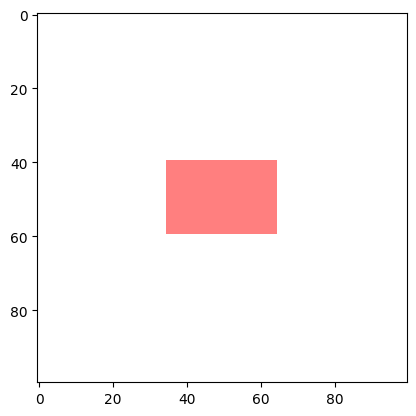

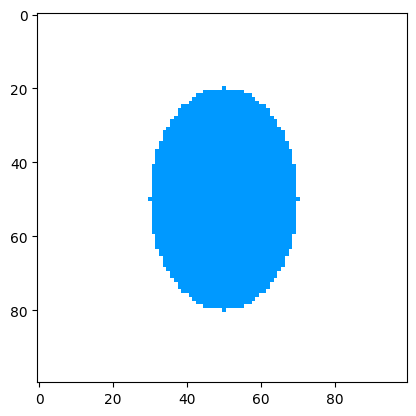

In [9]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.zeros((m, n, 3))
    image[:, :] = background_color
    image[m//2 - a//2 : m//2 + a//2, n//2 - b//2 : n//2 + b//2] = rectangle_color
    plt.imshow(image)
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3))
    image[:, :] = background_color
    x, y = np.meshgrid(np.arange(n), np.arange(m))
    ellipse = ((x - n//2)**2 / a**2 + (y - m//2)**2 / b**2) <= 1
    image[ellipse] = ellipse_color
    plt.imshow(image)
    plt.show()

m = 100
n = 100
a = 20
b = 30

background_color = (1, 1, 1)
rectangle_color = (1, 0.5, 0.5)
ellipse_color = (0, 0.6, 1)

draw_rectangle(a, b, m, n, rectangle_color, background_color)
draw_ellipse(a, b, m, n, ellipse_color, background_color)

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [10]:
def calculate_statistics(time_arr):
    mean = np.mean(time_arr)
    variance = np.var(time_arr)
    std_dev = np.std(time_arr)

    local_max = np.where((time_arr[1:-1] > time_arr[:-2]) & (time_arr[1:-1] > time_arr[2:]))[0] + 1
    local_min = np.where((time_arr[1:-1] < time_arr[:-2]) & (time_arr[1:-1] < time_arr[2:]))[0] + 1

    return mean, variance, std_dev, local_max, local_min

def sliding_arr(time_arr, p):
    return np.convolve(time_arr, np.ones(p), 'valid') / p

time_arr = np.array([6, 7, 8, 9, 5, 4, 3, 4, 5])

mean, variance, std_dev, local_max, local_min = calculate_statistics(time_arr)

print("Мат ожидание:", mean)
print("Дисперсия:", variance)
print("СКО:", std_dev)
print("Локальные максимумы:", local_max)
print("Локальные минимумы:", local_min)

p = 4
smoothed_series = sliding_arr(time_arr, p)
print("Ряд, получаемый методом скользящего среднего с размером окна", p, ":", smoothed_series)

Мат ожидание: 5.666666666666667
Дисперсия: 3.5555555555555554
СКО: 1.8856180831641267
Локальные максимумы: [3]
Локальные минимумы: [6]
Ряд, получаемый методом скользящего среднего с размером окна 4 : [7.5  7.25 6.5  5.25 4.   4.  ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [11]:
def one_hot_encoding(vector, num_classes):
    encoded = np.zeros((len(vector), num_classes))
    for i in range(len(vector)):
        encoded[i, vector[i]] = 1

    return encoded

test_vector = [0, 2, 3, 0]
num_classes = 4
test_encoded_vector = [[1, 0, 0, 0],
                       [0, 0, 1, 0],
                       [0, 0, 0, 1],
                       [1, 0, 0, 0]]

encoded_vector = one_hot_encoding(test_vector, num_classes)

assert np.array_equal(encoded_vector, test_encoded_vector)
print ('Тест пройден')

Тест пройден
